In [78]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

### 1. Preliminary data analysis

 Get the data from the 'diabetes.csv'\
 Get the independent and dependent variables\
 Splitting data with ratio 0.33

In [79]:
diabetes_data = pd.read_csv('diabetes.csv')
diabetes_data.info()
diabetes_data.describe()
## After preliminary data analysis, we can find the characters of the data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


### 2. Data processing
 Get the independent and dependent variables\
 Splitting data with ratio 0.33\
 Regularization
 

In [80]:
## Although there are many zeros in the original data set, I don't preprocess these zeros.
## Since there are too many rows with data zero, and if I dropout them, there will be too little data.
## And consider that there are too many 0, so if I use the average and median, it still can't have good performance.
diabetes_data = pd.read_csv('diabetes.csv')
X = diabetes_data.iloc[1:, :8]
for col in X.columns:
    ## Regularization
    X[col] = (X[col] - X[col].mean()) / X[col].std()
y = diabetes_data.iloc[1:, 8]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

### 3. Implementation of uni-variate tree method
 Use the decision tree

In [81]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)
y_pred_decision = decision_tree.predict(X_test)

### 4. Implementation of an ensemble model
 Use the random forest

In [82]:
random_forest = RandomForestClassifier()
random_forest.fit(X_train, y_train)
y_pred_random = random_forest.predict(X_test)

### 5. Print result
 Use the accuracy, precision, recall and f1 to assess the prediction results

In [83]:
decision_accuracy = accuracy_score(y_test, y_pred_decision)
decision_precision = precision_score(y_test, y_pred_decision)
decision_recall = recall_score(y_test, y_pred_decision)
decision_f1 = f1_score(y_test, y_pred_decision)

random_accuracy = accuracy_score(y_test, y_pred_random)
random_precision = precision_score(y_test, y_pred_random)
random_recall = recall_score(y_test, y_pred_random)
random_f1 = f1_score(y_test, y_pred_random)

print("Decision Tree:")
print("Accuracy:", decision_accuracy)
print("Precision:", decision_precision)
print("Recall:", decision_recall)
print("F1 Score:", decision_f1)
print()

print("Random Forest:")
print("Accuracy:", random_accuracy)
print("Precision:", random_precision)
print("Recall:", random_recall)
print("F1 Score:", random_f1)
print()

Decision Tree:
Accuracy: 0.7283464566929134
Precision: 0.5851063829787234
Recall: 0.6470588235294118
F1 Score: 0.6145251396648045

Random Forest:
Accuracy: 0.7519685039370079
Precision: 0.6309523809523809
Recall: 0.6235294117647059
F1 Score: 0.6272189349112426



### 6. Result visualizations

 Make it visualized\
 Compare the results of the two models using column chart\
 Show how the desicion tree splits the whole space\
 Show the desicion boundary of the desicion tree and the random forest

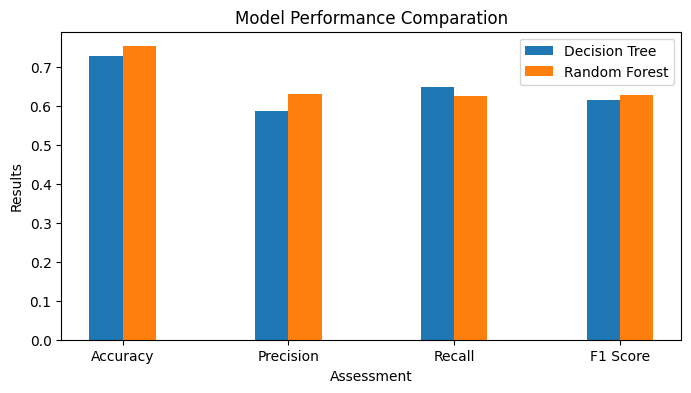

In [84]:
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
dt_scores = [decision_accuracy, decision_precision, decision_recall, decision_f1]
rf_scores = [random_accuracy, random_precision, random_recall, random_f1]

plt.figure(figsize=(8, 4))
x = np.arange(len(metrics))

plt.bar(x-0.1, dt_scores, width=0.2, align='center', label='Decision Tree')
plt.bar(x+0.1, rf_scores, width=0.2, align='center', label='Random Forest')
plt.title('Model Performance Comparation')
plt.xlabel('Assessment')
plt.ylabel('Results')
plt.xticks(x, metrics)
plt.legend()
plt.show()

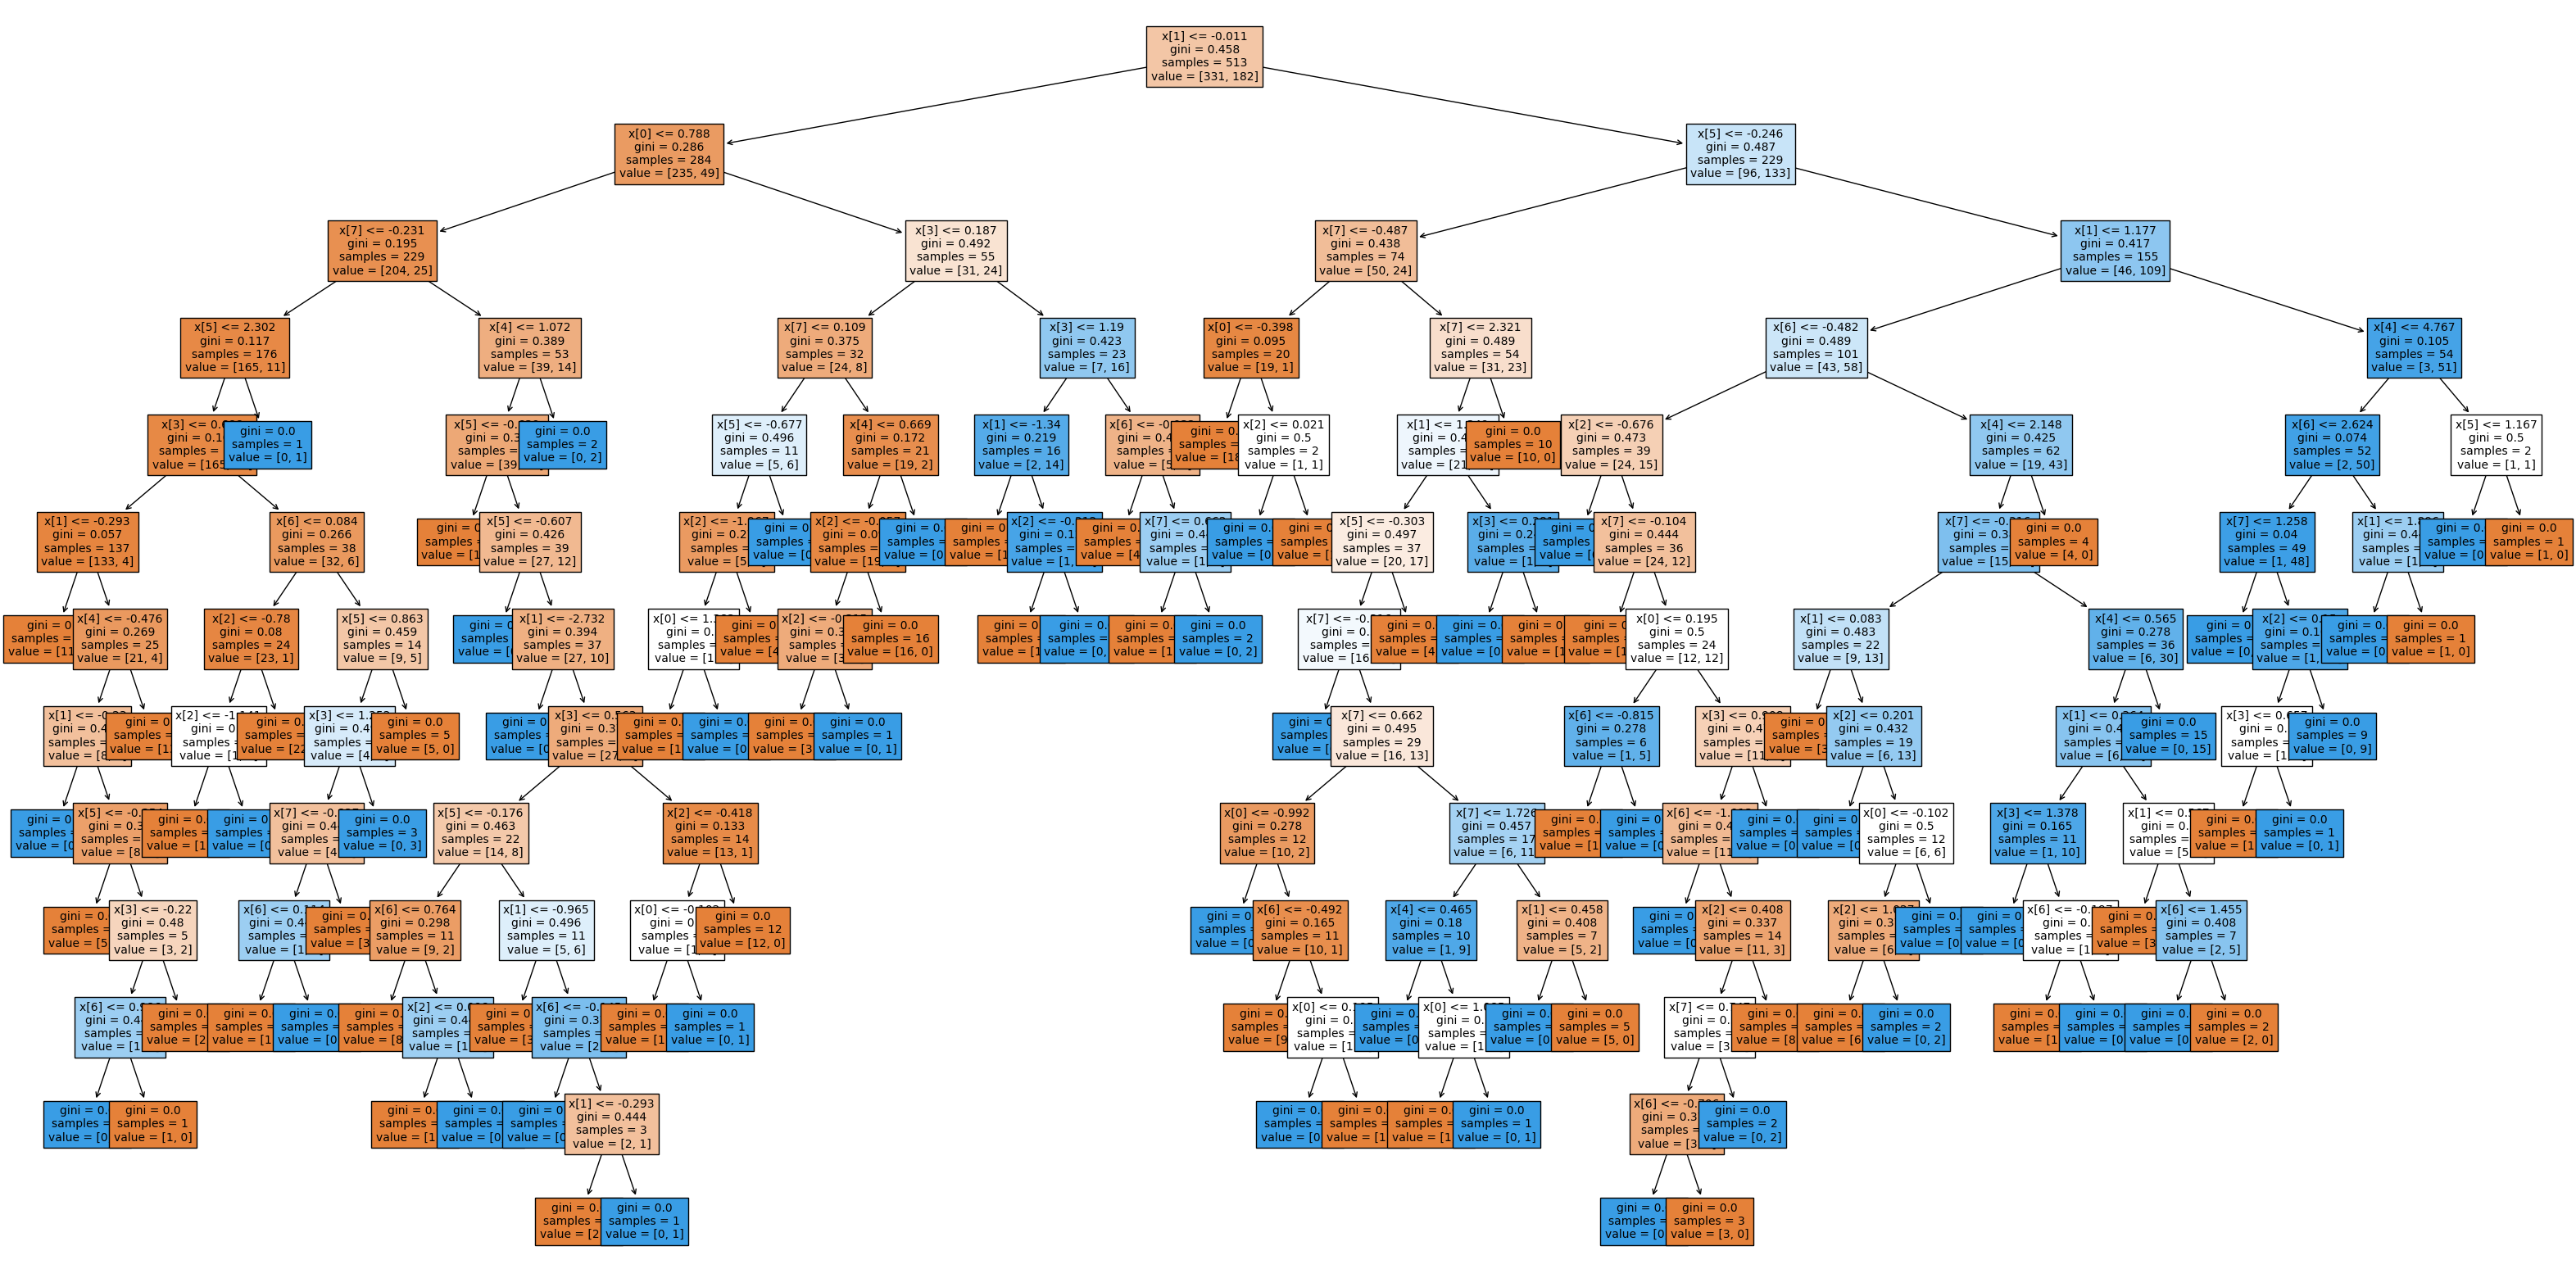

In [85]:
plt.figure(figsize=(40,20))
tree.plot_tree(decision_tree, filled = True, fontsize = 10)
plt.show()


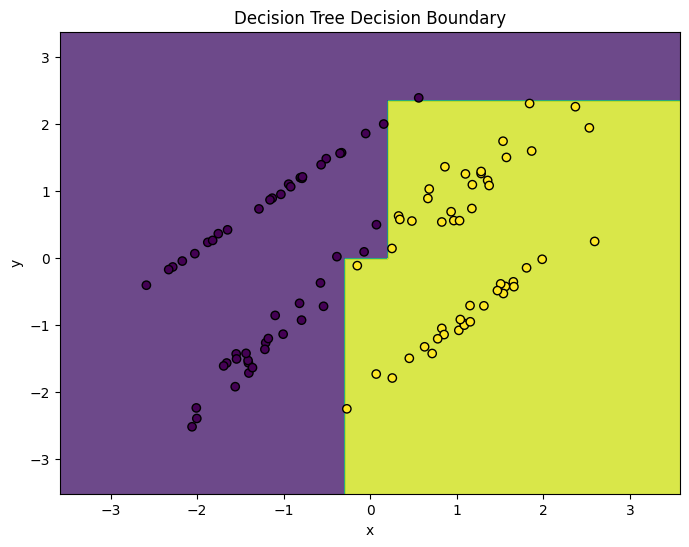

In [86]:
X, y = make_classification(n_samples=100, n_features=2, n_informative=2, n_redundant=0, random_state=42)
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X, y)
plt.figure(figsize=(8, 6))
h = 0.02 
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

Z = decision_tree.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Decision Tree Decision Boundary')
plt.show()

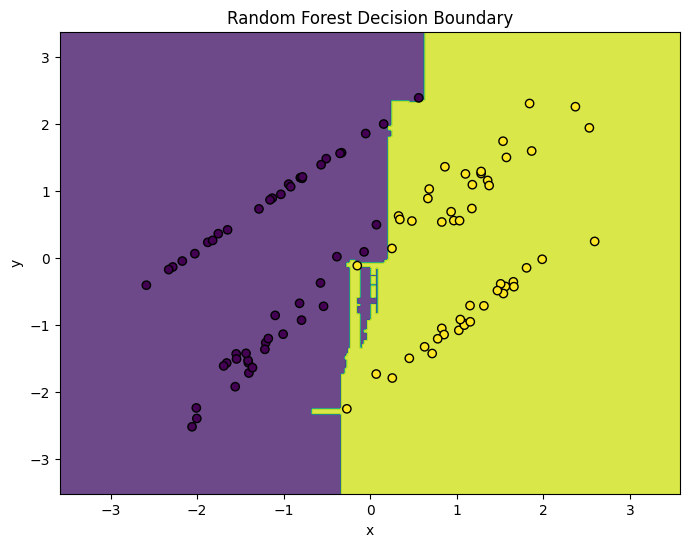

In [87]:
X, y = make_classification(n_samples=100, n_features=2, n_informative=2, n_redundant=0, random_state=42)
random_forest = RandomForestClassifier()
random_forest.fit(X, y)
plt.figure(figsize=(8, 6))
h = 0.02 
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

Z = random_forest.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Random Forest Decision Boundary')
plt.show()

### 7. comment and personal thinking: 
It's performing classification tasks using a decision tree and random forest 
models on a diabetes dataset. Random Forest model outperforms the Decision Tree model slightly in terms of accuracy and precision. However, the Decision Tree model has a slightly higher recall rate compared to the Random Forest model. This suggests that the Random Forest model has some performance improvements over the individual Decision Tree model on the diabetes dataset. However, it still nedds to be analyzed on a case-by-case basis. In this case, since the data set is separated, so the performance of random forest doesn't have huge advantages and desision tree can also do it well. 
